# Gmo Food Classification (or something like that)

In [1]:
# import the libraries we will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
# Combine the csv's into one large data frame called "df"

df1 = pd.read_csv('FOOD-DATA-GROUP1.csv')
df2 = pd.read_csv('FOOD-DATA-GROUP2.csv')
df3 = pd.read_csv('FOOD-DATA-GROUP3.csv')
df4 = pd.read_csv('FOOD-DATA-GROUP4.csv')
df5 = pd.read_csv('FOOD-DATA-GROUP5.csv')

df = pd.concat([df1, df2, df3 ,df4 ,df5],ignore_index=True)
df

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,717,717,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,718,718,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,719,719,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,720,720,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [3]:
# Drop the first two rows, they are useless and redundant
df = df.iloc[:, 2:]

In [4]:
df

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,0.900,0.000,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,7.800,0.000,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,0.800,0.100,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,1.500,0.000,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,1.200,0.000,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,...,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,...,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,...,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,...,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [5]:
# Make sure we don't have missing values
df.isnull().sum()

food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64

In [7]:
# Make 4 Quartiles, evenly distribute all rows, label and grade them A,B,C, D
df['Grade'] = pd.qcut(df['Nutrition Density'], q=4, labels=['D', 'C', 'B', 'A']) 
# I learned that these need to be reversed because the lowest score is assighned first. 
# We don't want to set thresh holds ourselves becaue the scale is not used to control the public but to only give a quicker 
# and easier way to compare that certain food will all other foods on the market.
df.head(20)

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,...,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Grade
0,cream cheese,51,5.0,2.9,1.300,0.200,0.800,0.500,0.9,0.0,...,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,D
1,neufchatel cheese,215,19.4,10.9,4.900,0.800,3.100,2.700,7.8,0.0,...,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,B
2,requeijao cremoso light catupiry,49,3.6,2.3,0.900,0.000,0.900,3.400,0.8,0.1,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,D
3,ricotta cheese,30,2.0,1.3,0.500,0.002,1.500,0.091,1.5,0.0,...,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,D
4,cream cheese low fat,30,2.3,1.4,0.600,0.042,1.200,0.900,1.2,0.0,...,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,C
5,cream cheese fat free,19,0.2,0.1,0.091,0.075,1.400,1.000,2.8,0.0,...,0.039,0.053,4.000,0.028,94.100,50.0,0.013,0.300,67.679,B
6,gruyere cheese,116,9.1,5.3,2.800,0.500,0.100,0.100,8.3,0.0,...,0.033,0.094,10.100,0.002,169.400,22.7,0.079,1.100,300.694,A
7,cheddar cheese,113,9.3,5.3,2.600,0.300,0.900,0.100,6.4,0.0,...,0.099,0.077,7.600,0.063,127.400,21.3,0.009,1.000,215.530,A
8,parmesan cheese,71,4.5,2.7,1.400,0.100,0.600,0.046,6.4,0.0,...,0.051,0.100,7.900,0.073,124.900,16.6,0.045,0.500,224.777,A
9,romano cheese,19,1.3,0.9,0.400,0.035,0.200,0.088,1.6,0.0,...,0.046,0.030,2.100,0.002,38.000,4.3,0.087,0.100,56.380,B


In [8]:
df['Grade'].value_counts()
# Ensure a even distribution

Grade
D    599
C    599
A    599
B    598
Name: count, dtype: int64

In [9]:
# Drop non-numeric and target columns
X = df.drop(columns=['food', 'Grade'])
y = df['Grade']

# Split into training and test sets (stratify ensures grade balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs'))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=False)

conf_matrix, class_report


C:\Users\Tony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


(array([[115,   5,   0,   0],
        [  3, 112,   4,   0],
        [  0,   8,  96,  16],
        [  0,   0,   9, 111]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           A       0.97      0.96      0.97       120\n           B       0.90      0.94      0.92       119\n           C       0.88      0.80      0.84       120\n           D       0.87      0.93      0.90       120\n\n    accuracy                           0.91       479\n   macro avg       0.91      0.91      0.91       479\nweighted avg       0.91      0.91      0.91       479\n')

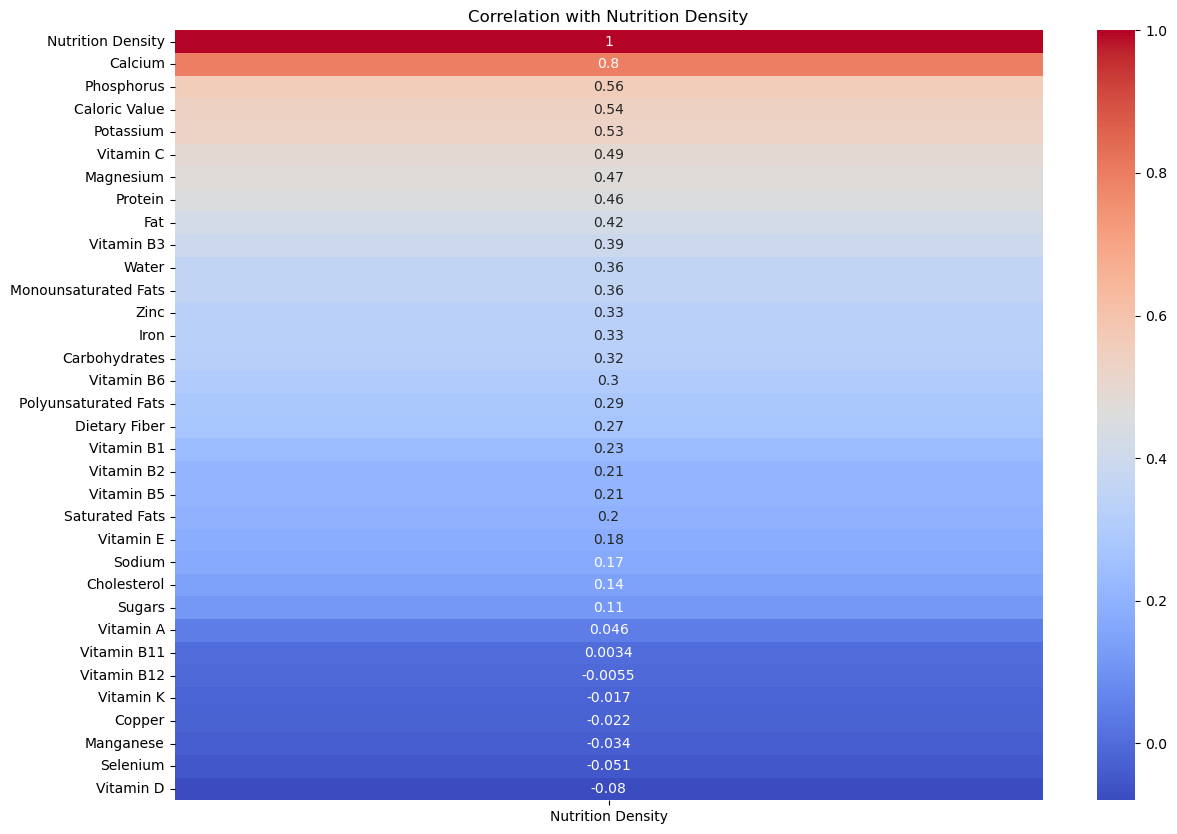

In [10]:
correlation = df.select_dtypes(include='number').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation[['Nutrition Density']].sort_values(by='Nutrition Density', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Nutrition Density')
plt.show()